# Final Assessment
## **Equipo 4**:
| <h2>Alumno</h2> | <h2>Matricula</h2> |
| ---|---|
| <h1>**Mauricio Juárez Sánchez**</h1> | <h1>A01660336</h1> |
| <h1>**Alfredo Jeong Hyun Park**</h1> | <h1>A01658259</h1> |
| <h1>**Fernando Alfonso Arana Salas**</h1> | <h1>A01272933</h1> |
| <h1>**Miguel Ángel Bustamante Pérez**</h1> | <h1>A01781583</h1> |

# Dataset Visualization (20 pts)

Import relevant libraries.

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # CSV file
import scipy.io.wavfile as sci_wav  # Open wav files
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from tqdm import tqdm
import librosa
from IPython.display import Audio

In [ ]:
### Connect google drive
from google.colab import drive
drive.mount('/content/drive') # Stablish conection

Mounted at /content/drive


In [2]:
# assesment_path = '/content/drive/MyDrive/7mo-Semestre/Natural-Languaje-Processing/Final Assessment/data'
#CSV_PATH = '/content/drive/MyDrive/AI Equipo 4/Tareas/Natural Language Processing/FinalAssesment/cats-dogs/train_test_split.csv'
assesment_path = '/Users/fernankiwi/Downloads'
file_path = [os.path.join(assesment_path,x) for x in os.listdir(assesment_path) if "." not in x]
animals = [x for x in os.listdir(assesment_path)]

audio_paths = []
for gener, i in zip(animals,tqdm(file_path)):
    for j in os.listdir(i):
        file = os.path.join(i,j)
        audio_paths.append([file,gener])
df = pd.DataFrame(audio_paths, columns=['File', 'Animal'])
df

100%|██████████| 2/2 [00:00<00:00, 1972.40it/s]


,File,Animal
0,/Users/fernankiwi/Downloads/Cat/cat_74.wav,Cat
1,/Users/fernankiwi/Downloads/Cat/cat_60.wav,Cat
2,/Users/fernankiwi/Downloads/Cat/cat_48.wav,Cat
3,/Users/fernankiwi/Downloads/Cat/cat_126.wav,Cat
4,/Users/fernankiwi/Downloads/Cat/cat_132.wav,Cat
...,...,...
272,/Users/fernankiwi/Downloads/Dog/dog_barking_10...,.DS_Store
273,/Users/fernankiwi/Downloads/Dog/dog_barking_91...,.DS_Store
274,/Users/fernankiwi/Downloads/Dog/dog_barking_85...,.DS_Store
275,/Users/fernankiwi/Downloads/Dog/dog_barking_52...,.DS_Store


Esta función toma una lista de rutas de archivos WAV, las lee una por una, y devuelve una lista de señales de audio correspondientes a esos archivos. La variable ROOT_DIR debe estar definida en otro lugar del código para que esta función funcione correctamente, ya que se utiliza para construir las rutas completas de los archivos WAV.

In [3]:
def read_wav_files(wav_files):
    '''Returns a list of audio waves
    Params:
        wav_files: List of .wav paths

    Returns:
        List of audio signals
    '''
    if not isinstance(wav_files, list):
        wav_files = [wav_files]
    return [sci_wav.read(ROOT_DIR + f)[1] for f in wav_files]

Esta función se utiliza para extraer una trama (fragmento) de un array unidimensional _X basándose en el índice idx, la longitud de muestra sample_len y la opción de aplicar un desplazamiento aleatorio opcional. Esto es útil para dividir un conjunto de datos de audio en tramas más pequeñas para su procesamiento o análisis.

In [4]:
def get_trunk(_X, idx, sample_len, rand_offset=False):
    '''Returns a trunk of the 1D array <_X>

    Params:
        _X: the concatenated audio samples
        idx: _X will be split in <sample_len> items. _X[idx]
        rand_offset: boolean to say whether or not we use an offset
    '''
    randint = np.random.randint(10000) if rand_offset is True else 0
    start_idx = (idx * sample_len + randint) % len(_X)
    end_idx = ((idx + 1) * sample_len + randint) % len(_X)
    if end_idx > start_idx:  # normal case
        return _X[start_idx: end_idx]
    else:
        return np.concatenate((_X[start_idx:], _X[:end_idx]))

Esta función se utiliza para aumentar una trama de audio seleccionada aleatoriamente de un conjunto de datos de audio. La idea es enriquecer la muestra original con muestras adicionales de la misma clase, lo que puede ser útil para mejorar la robustez y la diversidad de los datos utilizados en tareas de procesamiento de señales de audio o aprendizaje automático, como entrenar modelos de clasificación de audio.






In [5]:
def get_augmented_trunk(_X, idx, sample_len, added_samples=0):
    X = get_trunk(_X, idx, sample_len)

    # Add other audio of the same class to this sample
    for _ in range(added_samples):
        ridx = np.random.randint(len(_X))  # random index
        X = X + get_trunk(_X, ridx, sample_len)

    # One might add more processing (like adding noise)

    return X

Esta función genera lotes de datos para el entrenamiento o evaluación de modelos de aprendizaje automático utilizando un conjunto de datos de audio. Los lotes contienen muestras de audio con etiquetas de clase y pueden ser aumentados en función del valor de sample_augmentation. Esto es útil para entrenar y evaluar modelos de clasificación de audio.

In [6]:
def dataset_gen(is_train=True, batch_shape=(20, 16000), sample_augmentation=0):
    '''This generator is going to return training batchs of size <batch_shape>

    Params:
        is_train: True if you want the training generator
        batch_shape: a tupple (or list) consisting of 2 arguments, the number
            of samples per batchs and the number datapoints per samples
            (16000=1s)
        sample_augmentation: augment each audio sample by n other audio sample.
            Only works when <is_train> is True
    '''
    s_per_batch = batch_shape[0]
    s_len = batch_shape[1]

    X_cat = dataset['train_cat'] if is_train else dataset['test_cat']
    X_dog = dataset['train_dog'] if is_train else dataset['test_dog']

    # Random permutations (for X indexes)
    nbatch = int(max(len(X_cat), len(X_cat)) / s_len)
    perms = [list(enumerate([i] * nbatch)) for i in range(2)]
    perms = sum(perms, [])
    random.shuffle(perms)


    # Go through all the permutations
    y_batch = np.zeros(s_per_batch)
    X_batch = np.zeros(batch_shape)
    while len(perms) > s_per_batch:

        # Generate a batch
        for bidx in range(s_per_batch):
            perm, _y = perms.pop()  # Load the permutation
            y_batch[bidx] = _y

            # Select wether the sample is a cat or a dog
            _X = X_cat if _y == 0 else X_dog

            # Apply the permutation to the good set
            if is_train:
                X_batch[bidx] = get_augmented_trunk(
                    _X,
                    idx=perm,
                    sample_len=s_len,
                    added_samples=sample_augmentation)
            else:
                X_batch[bidx] = get_trunk(_X, perm, s_len)

        yield (X_batch.reshape(s_per_batch, s_len, 1),
               y_batch.reshape(-1, 1))

Esta función carga y normaliza un conjunto de datos de audio desde un DataFrame de pandas, calculando estadísticas y normalizando las grabaciones de audio antes de almacenarlas en un diccionario para su posterior uso en tareas de procesamiento o análisis de señales de audio.

In [7]:
def load_dataset(dataframe):
    '''Load the dataset in a dictionary.
    From the dataframe, it reads the [train_cat, train_dog, test_cat, test_dog]
    columns and loads their corresponding arrays into the <dataset> dictionary

    Params:
        dataframe: a pandas dataframe with 4 columns [train_cat, train_dog,
        test_cat, test_dog]. In each columns, many WAV names (eg. ['cat_1.wav',
        'cat_2.wav']) which are going to be read and appended into a list

    Return:
        dataset = {
            'train_cat': [[0,2,3,6,1,4,8,...],[2,5,4,6,8,7,4,5,...],...]
            'train_dog': [[sound 1],[sound 2],...]
            'test_cat': [[sound 1],[sound 2],...]
            'test_dog': [[sound 1],[sound 2],...]
        }
    '''
    df = dataframe

    dataset = {}
    for k in ['train_cat', 'train_dog', 'test_cat', 'test_dog']:
        v = list(df[k].dropna())
        v = read_wav_files(v)
        v = np.concatenate(v).astype('float32')

        # Compute mean and variance
        if k == 'train_cat':
            dog_std = dog_mean = 0
            cat_std, cat_mean = v.std(), v.mean()
        elif k == 'train_dog':
            dog_std, dog_mean = v.std(), v.mean()

        # Mean and variance suppression
        std, mean = (cat_std, cat_mean) if 'cat' in k else (dog_std, dog_mean)
        v = (v - mean) / std
        dataset[k] = v

        print('loaded {} with {} sec of audio'.format(k, len(v) / 16000))

    return dataset

Visualize the dataframe

In [8]:
df.head(10)

,File,Animal
0,/Users/fernankiwi/Downloads/Cat/cat_74.wav,Cat
1,/Users/fernankiwi/Downloads/Cat/cat_60.wav,Cat
2,/Users/fernankiwi/Downloads/Cat/cat_48.wav,Cat
3,/Users/fernankiwi/Downloads/Cat/cat_126.wav,Cat
4,/Users/fernankiwi/Downloads/Cat/cat_132.wav,Cat
5,/Users/fernankiwi/Downloads/Cat/cat_133.wav,Cat
6,/Users/fernankiwi/Downloads/Cat/cat_127.wav,Cat
7,/Users/fernankiwi/Downloads/Cat/cat_49.wav,Cat
8,/Users/fernankiwi/Downloads/Cat/cat_61.wav,Cat
9,/Users/fernankiwi/Downloads/Cat/cat_75.wav,Cat


Playing a sound

In [9]:
audio_file_cat = '/content/drive/MyDrive/7mo-Semestre/Natural-Languaje-Processing/Final Assessment/data/Cat/cat_100.wav'
audio_file_cat = '/content/drive/MyDrive/cats_dogs/cat_100.wav'

In [ ]:
train_cat_data, sampling_rate_train_cat = librosa.load(audio_file_cat)
print(f'cat data (y-axis) amplitude: {train_cat_data}')
print(f'sr: {sampling_rate_train_cat} Hz')
# Play the sound
Audio(data=audio_file_cat, rate=sampling_rate_train_cat )

### Wave sound visualization
Here are some plots to understand the time domain, frequency features like the amplitude, frequency and amplitude envelope.

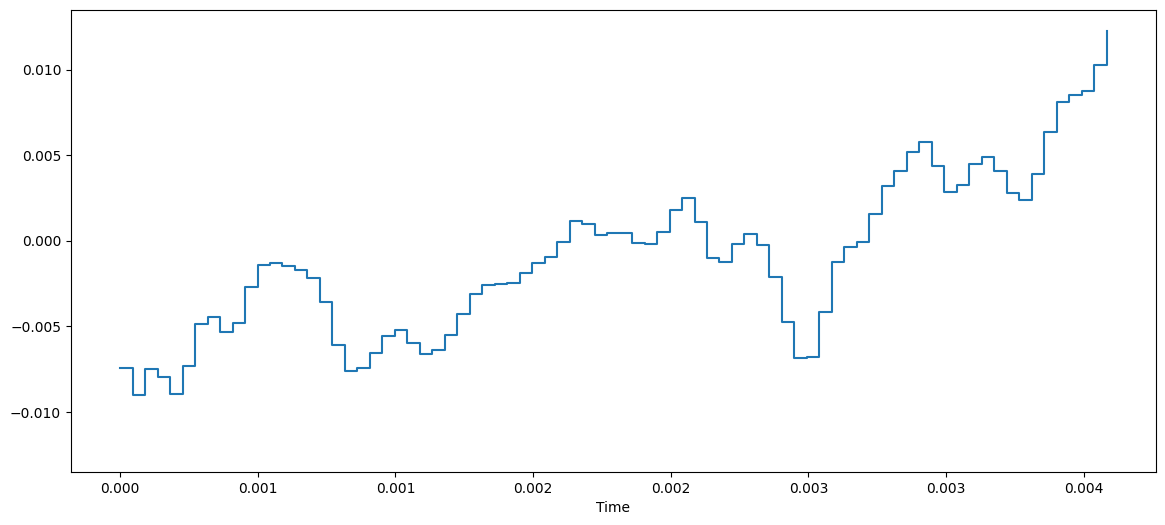

In [ ]:
# plot the data of the cat
plt.figure(figsize=(14, 6))
#Displaying the first 80 samples of my train_cat_data
librosa.display.waveshow(train_cat_data[:80], sr=sampling_rate_train_cat)
plt.show()

In [ ]:
audio_file_dog = '/content/drive/MyDrive/7mo-Semestre/Natural-Languaje-Processing/Final Assessment/data/Dog/dog_barking_17.wav'
audio_file_dog = '/content/drive/MyDrive/cats_dogs/dog_barking_17.wav'
train_dog_data, sampling_rate_train_dog = librosa.load(audio_file_dog)
print(f'dog data amplitude: {train_dog_data}')
print(f'sr: {sampling_rate_train_dog} Hz')
# Play the sound
Audio(data=audio_file_dog, rate=sampling_rate_train_dog )

dog data amplitude: [-0.0002854  -0.00010689  0.00018771 ... -0.01302722 -0.0115308
 -0.00430108]
sr: 22050 Hz


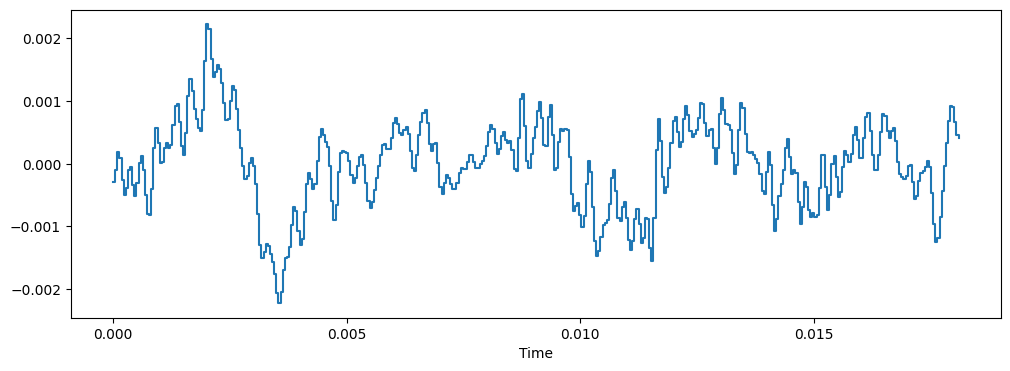

In [ ]:
# plot the data of the dog
plt.figure(figsize=(12, 4))
librosa.display.waveshow(train_dog_data[:400], sr=sampling_rate_train_dog)
plt.show()

We can see that both plots are different, but in this case they are periodic waves.
In terms of **Amplitude** the dog's wave has more amplitude than the cat's wave, this menas it has a higher air pressure disturbance, in this case it's something interesting because the dog is just barking and it also appears that is not that close to the microphone that is recording the audio, this means that the dog's bark is more loudly and powerful, in contrast the cat's audio has different changes in it's shape, this is because the animal is not only meowing, it's also purring, that creates a different sample with different tonalities.
Another thing to consider is that the frequency of the cat's wave and the dog's wave is the same, both are equal to 22050 Hz.

# Feature Extraction (20 pts)

## Amplitude Envelope

In [ ]:
# The amplitude envelope of a sound wave describes the variation of the amplitude over time.
def get_amplitude_envelope(signal,frame_size,window_size):
  envelope = []
  for i in range(0,len(signal),window_size):
    frame_data = signal[i:i+frame_size]
    max_amp = max(frame_data)
    envelope.append(max_amp)
  return np.array(envelope)

For the cat's wave:

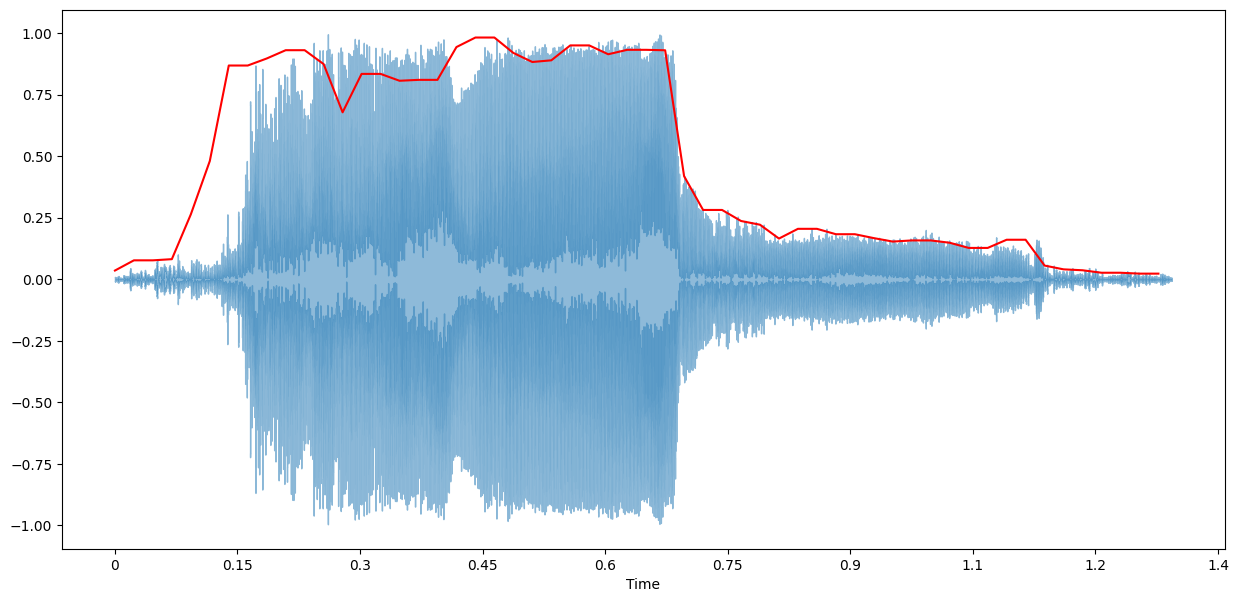

In [ ]:
# Get de envelope
amplitude_envelope=get_amplitude_envelope(train_cat_data,1024,512)
# Frames to time representation
frames = range(0, len(amplitude_envelope))

time = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 7))
librosa.display.waveshow(train_cat_data, alpha=0.5)
plt.plot(time, amplitude_envelope, color="r")

For the dog's wave:

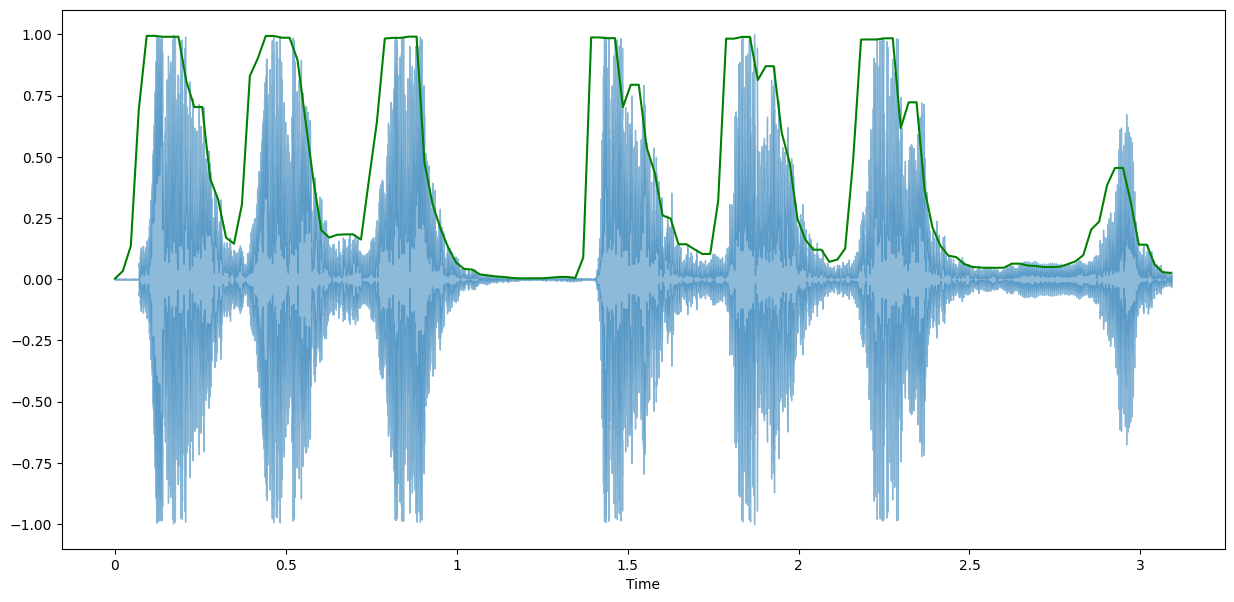

In [ ]:
# Get de envelope
amplitude_envelope=get_amplitude_envelope(train_dog_data,1024,512)
# Frames to time representation
frames = range(0, len(amplitude_envelope))

time = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 7))
librosa.display.waveshow(train_dog_data, alpha=0.5)
plt.plot(time, amplitude_envelope, color="green")

## RMS

In [ ]:
def get_rms(signal,frame_size,window_size):
  new_signal = []
  for i in range(0,len(signal),window_size):
    frame_data = signal[i:i+frame_size]
    rmse_val = np.sqrt(1 / len(frame_data) * sum(i**2 for i in frame_data))
    new_signal.append(rmse_val)
  return np.array(new_signal)

For the cat's data:

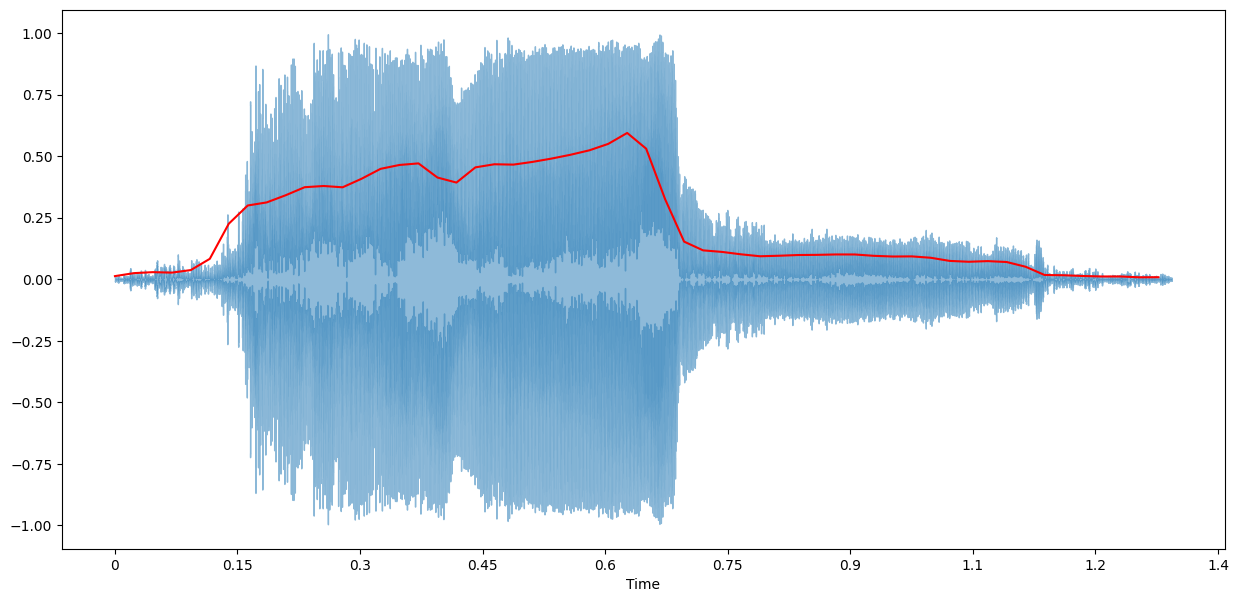

In [ ]:
# Get rms signal
rms=get_rms(train_cat_data,1024,512)
# Frames to time representation
frames = range(0, len(rms))
time = librosa.frames_to_time(frames, hop_length=512)
plt.figure(figsize=(15, 7))
librosa.display.waveshow(train_cat_data, alpha=0.5)
plt.plot(time, rms, color="r")

For the dog's data:

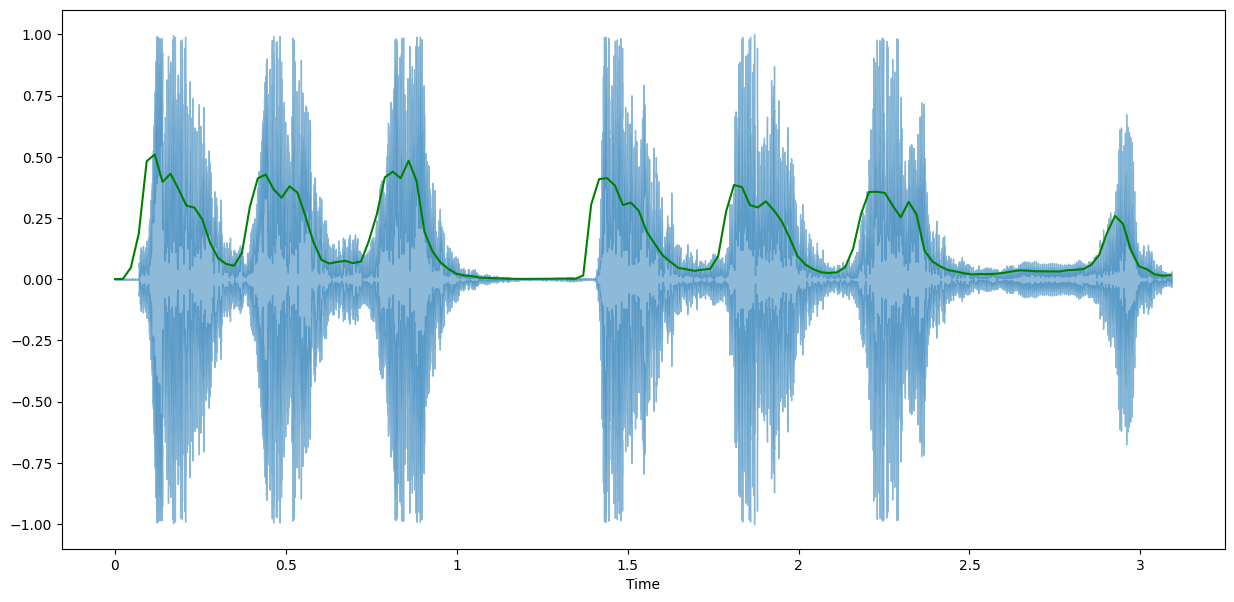

In [ ]:
# Get rms signal
rms=get_rms(train_dog_data,1024,512)
# Frames to time representation
frames = range(0, len(rms))
time = librosa.frames_to_time(frames, hop_length=512)
plt.figure(figsize=(15, 7))
librosa.display.waveshow(train_dog_data, alpha=0.5)
plt.plot(time, rms, color="g")

## Data exploration

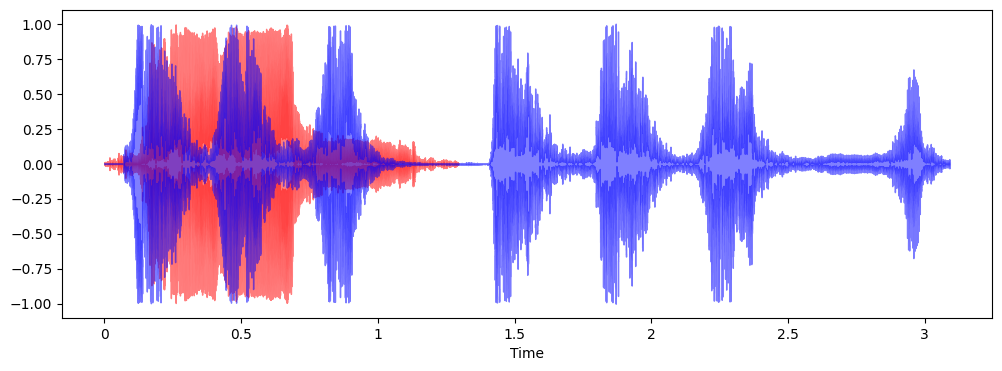

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(train_cat_data, color='r',alpha=0.5)
librosa.display.waveshow(train_dog_data,color='b',alpha=0.5)
plt.show()

## Frequency domain

Text(0, 0.5, 'Amplitude')

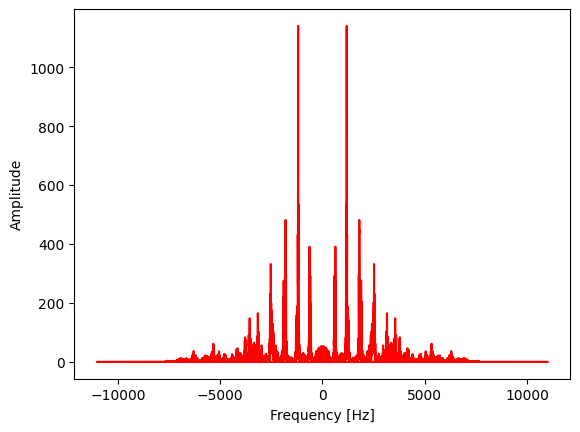

In [ ]:
cat_f = np.abs(np.fft.fft(train_cat_data))
freq_steps = np.fft.fftfreq(train_cat_data.size, d=1/sampling_rate_train_cat)
plt.figure()
plt.plot(freq_steps, cat_f, color='r')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")

In [ ]:
from scipy import stats
stats.describe(train_cat_data)

DescribeResult(nobs=28522, minmax=(-0.99560505, 0.98217326), mean=1.8618754e-05, variance=0.08572168190617795, skewness=-0.1559986833017979, kurtosis=2.0628065390440344)

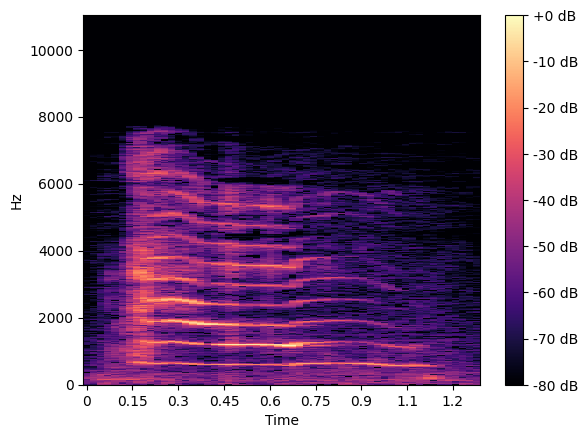

In [ ]:
D = librosa.stft(train_cat_data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

Text(0, 0.5, 'Amplitude')

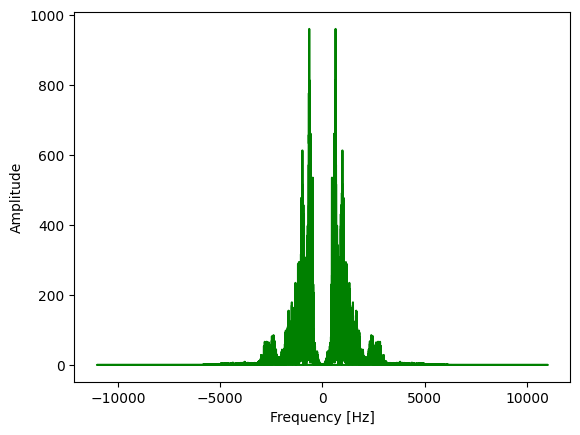

In [ ]:
dog_f = np.abs(np.fft.fft(train_dog_data))
freq_steps = np.fft.fftfreq(train_dog_data.size, d=1/sampling_rate_train_dog)
plt.figure()
plt.plot(freq_steps, dog_f, color='g')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")

In [ ]:
stats.describe(train_dog_data)

DescribeResult(nobs=68179, minmax=(-1.0008066, 0.9941127), mean=-1.8163753e-05, variance=0.04680691394558119, skewness=0.03423281035901629, kurtosis=4.211556362481475)

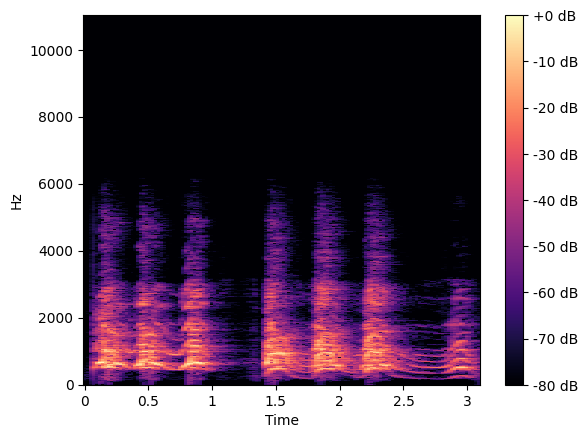

In [ ]:
D = librosa.stft(train_dog_data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

## Time domain features

In [ ]:
def amplitude_envelope(signal, frame_size, window_size):
  return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, window_size)])

In [ ]:
def extract_time_domain_features(path):
    ## get wave data
    animal_data,_ = librosa.load(path)

    ## get as time series
    FRAME_SIZE = 1024
    WINDOW_SIZE = 128
    ae = amplitude_envelope(animal_data,FRAME_SIZE,WINDOW_SIZE)
    rms = librosa.feature.rms(y=animal_data, frame_length=FRAME_SIZE, hop_length=WINDOW_SIZE)[0]
    zcr = librosa.feature.zero_crossing_rate(animal_data, frame_length=FRAME_SIZE, hop_length=WINDOW_SIZE)[0]

    ## aggregate with statistics
    ae_stats = stats.describe(ae)
    rms_stats = stats.describe(rms)
    zcr_stats = stats.describe(zcr)
    data_features_vector=[ae_stats.minmax[0],ae_stats.minmax[1],ae_stats.mean,ae_stats.variance,
                         rms_stats.minmax[0],rms_stats.minmax[1],rms_stats.mean,rms_stats.variance,
                         zcr_stats.minmax[0],zcr_stats.minmax[1],zcr_stats.mean,zcr_stats.variance]
    return data_features_vector

In [ ]:
data_features_dog = extract_time_domain_features(audio_file_dog)
data_features_cat = extract_time_domain_features(audio_file_cat)
print(data_features_dog)
print(data_features_cat)

[0.0016826941, 0.9941127, 0.41266116, 0.1424934571903003, 0.00047577787, 0.5109225, 0.1567009, 0.022261597723805142, 0.037109375, 0.1318359375, 0.07101789692776736, 0.00023916951573019993]
[0.013610336, 0.98217326, 0.47239652, 0.14223675798993926, 0.0057968935, 0.59439886, 0.22165747, 0.03668465847904617, 0.03125, 0.2666015625, 0.11141570908071749, 0.0042064778709326855]


## Building Dataset

In [ ]:
#File and type of animal
df["time_vector"] = df["File"].apply(extract_time_domain_features)
df = df.assign(
    min_ae = df["time_vector"].apply(lambda x : x[0]),
    max_ae = df["time_vector"].apply(lambda x : x[1]),
    mean_ae = df["time_vector"].apply(lambda x : x[2]),
    variance_ae = df["time_vector"].apply(lambda x : x[3]),
    min_rms = df["time_vector"].apply(lambda x : x[4]),
    max_rms = df["time_vector"].apply(lambda x : x[5]),
    mean_rms = df["time_vector"].apply(lambda x : x[6]),
    variance_rms = df["time_vector"].apply(lambda x : x[7]),
    min_zcr = df["time_vector"].apply(lambda x : x[8]),
    max_zcr = df["time_vector"].apply(lambda x : x[9]),
    mean_zcr = df["time_vector"].apply(lambda x : x[10]),
    variance_zcr = df["time_vector"].apply(lambda x : x[11]),
)

df = df.drop("time_vector",axis="columns")

KeyError: ignored

In [ ]:
def extract_freq_domain_features(path):
  animal_data,_ = librosa.load(path)
  fq = np.abs(np.fft.fft(animal_data))
  fq_stats = stats.describe(fq)
  return [fq_stats.minmax[0],fq_stats.minmax[1],fq_stats.mean,fq_stats.variance]

In [ ]:
df["freq_vector"] = df["File"].apply(extract_freq_domain_features)

In [ ]:
df = df.assign(
    min_fq = df["freq_vector"].apply(lambda x : x[0]),
    max_fq = df["freq_vector"].apply(lambda x : x[1]),
    mean_fq = df["freq_vector"].apply(lambda x : x[2]),
    variance_fq = df["freq_vector"].apply(lambda x : x[3])
)
df = df.drop("freq_vector",axis="columns")
df = df.drop("File",axis="columns")

In [ ]:
df

,Animal,min_ae,max_ae,mean_ae,variance_ae,min_rms,max_rms,mean_rms,variance_rms,min_zcr,max_zcr,mean_zcr,variance_zcr,min_fq,max_fq,mean_fq,variance_fq


# Dimension Analysis (40 pts)

In [ ]:
# define the independent variables (the ones that help with the prediction)
X = df.drop('Animal',axis="columns") # store everything but the column animal
# define the dependent variable (the one that is going to be predicted based on the independent variables)
y = df['Animal'] #store the animal column only

In [ ]:
X.describe()

,min_ae,max_ae,mean_ae,variance_ae,min_rms,max_rms,mean_rms,variance_rms,min_zcr,max_zcr,mean_zcr,variance_zcr,min_fq,max_fq,mean_fq,variance_fq
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y

Series([], Name: Animal, dtype: object)

## Split DataFrame for future validations

This is not mandatory for pca however it's recommended to work transformations and training in our train dataset always

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ValueError: ignored

## Standarization of dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored

## PCA analysis

The Principal Component Analysis it's a powerful tool to analize data and reduce dimensionality. This can aid with the data visualization and modeling.

By default we can create PCA for all the components (dimensions) but it is also posible to specify how many components we want to analyse / reduce, also we can send as parameter what is the minimum variance we are looking for to keep.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In this example we are using to methods (fit_transform) that performs the analys and transformation of the obervations all in once. the second method /(transform) will only transform the data based on the analysis maded in fir_transofrm method.

Let's see how the weights our new dimension is conformed, each component (sorted by variance) will transform each value of the dataset by the following dimension proportions.

In [ ]:
pd.DataFrame(
    data    = pca.components_,
    columns = X.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16']
)

,min_ae,max_ae,mean_ae,variance_ae,min_rms,max_rms,mean_rms,variance_rms,min_zcr,max_zcr,mean_zcr,variance_zcr,min_fq,max_fq,mean_fq,variance_fq
PC1,0.008609,0.329720,0.369024,0.341106,0.022148,0.351053,0.379984,0.346085,0.000364,-0.129957,-0.048243,-0.068121,0.026311,0.154663,0.284359,0.348508
PC2,-0.278391,0.029774,-0.088734,0.139165,-0.264740,0.090165,-0.106157,0.117971,-0.118850,0.565872,0.339357,0.539881,0.080497,0.048960,0.199954,0.033738
PC3,0.425902,0.064652,0.163659,0.091095,0.242378,-0.180482,0.033289,-0.036662,0.490948,0.072187,0.537396,0.037682,0.058787,-0.333439,0.175909,-0.059465
PC4,0.167588,-0.106180,-0.000708,-0.282239,0.471819,-0.089016,0.025785,-0.249688,-0.230912,0.142806,-0.138704,0.115887,0.467983,0.240232,0.358534,0.275293
PC5,-0.040848,-0.224482,0.324353,-0.257982,-0.139010,-0.240121,0.363110,-0.236660,0.178024,0.133174,0.132018,0.076096,-0.444683,0.421161,-0.106573,0.228509
PC6,0.401752,-0.116083,0.172995,0.089625,0.042143,-0.175366,0.144075,0.104889,-0.598901,-0.051965,-0.104389,0.342301,-0.341675,-0.335621,0.014700,-0.061828
PC7,0.137103,-0.323391,0.190919,0.294644,-0.363344,-0.386222,0.178204,0.180733,-0.040102,0.056138,-0.039363,-0.131082,0.568048,0.112281,-0.203865,-0.086085
PC8,0.371302,-0.304111,-0.359098,0.206006,0.106708,-0.007861,-0.315106,0.415606,0.065404,0.057722,0.037587,-0.115693,-0.273983,0.433078,0.096013,0.143333
PC9,0.230137,0.398423,0.053376,0.035888,0.247951,0.097605,0.067942,0.015343,0.006204,0.045303,-0.000960,0.301090,0.083161,0.459002,-0.433251,-0.458529
PC10,-0.453113,-0.461976,0.111762,0.108367,0.575871,0.043557,0.160475,0.310924,0.132584,0.006631,-0.037381,0.151099,-0.012320,-0.125949,-0.172411,-0.116149


PLotting the components in a heat map helps to understand how original dimensions influence in the new component. For example in the first component (the one with more variance) Zero Cross rate helps better to express data in terms of variance.

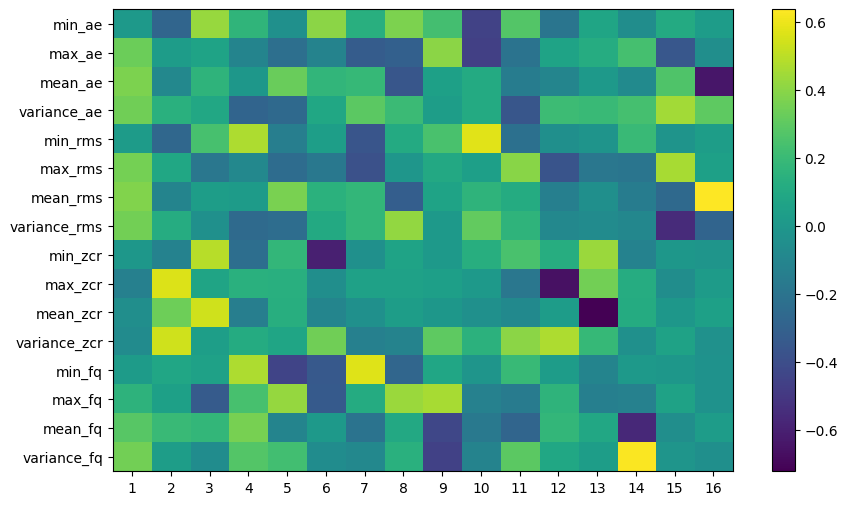

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Another important measure is the variance ratio, this means how much in percentage of variance each component represents, for example component 1 just by it self representes 58%

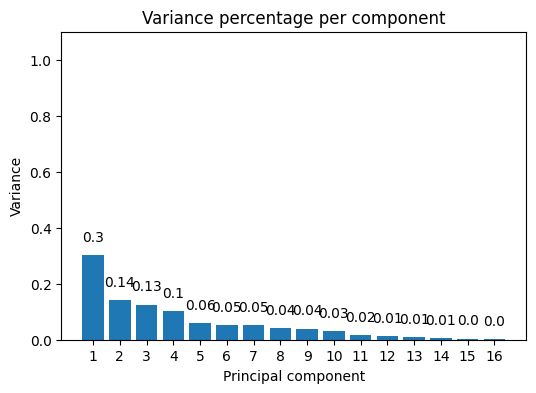

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Variance percentage per component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Variance');

Actually we can acumulate the percentage by including components, if we do it in order , then we might be able to perform an elbow test, this is, what is the minimum number of components needed to capture a minumum percentage of variance in my new dimension space (the elbow).

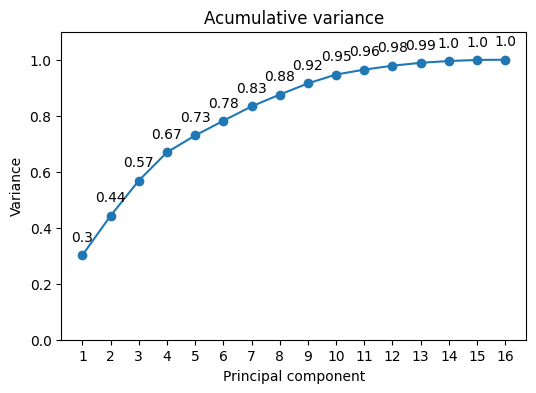

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    pca.explained_variance_ratio_.cumsum(),
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_.cumsum()):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Acumulative variance')
ax.set_xlabel('Principal component')
ax.set_ylabel('Variance');

We can stablish a number of components and apply the fit and transform methods too.

In [ ]:
pca = PCA(3)
projected = pca.fit_transform(X_train)
print(X_train.data.shape)
print(projected.shape)

(221, 16)
(221, 3)


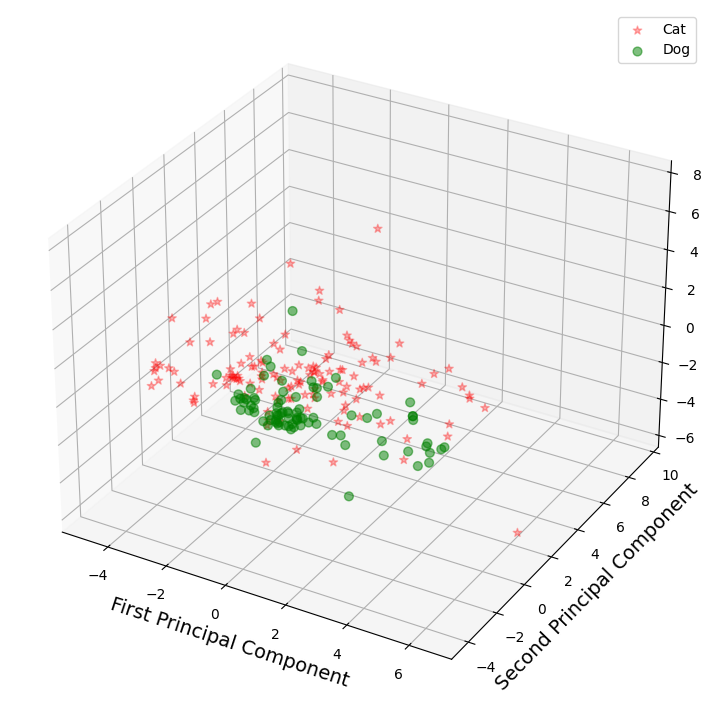

In [ ]:
Xax=projected[:,0]
Yax=projected[:,1]
Zax=projected[:,2]
labels=y_train
cdict={"Cat":'red',"Dog":'green'}
marker={"Cat":'*',"Dog":'o'}
alpha={"Cat":.3, "Dog":.5}
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(projection='3d')
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],Zax[ix],c=cdict[l],label=l,s=40,marker=marker[l],alpha=alpha[l])


plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)

plt.legend()
plt.show()

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
y_predict = lda.predict(X_test)

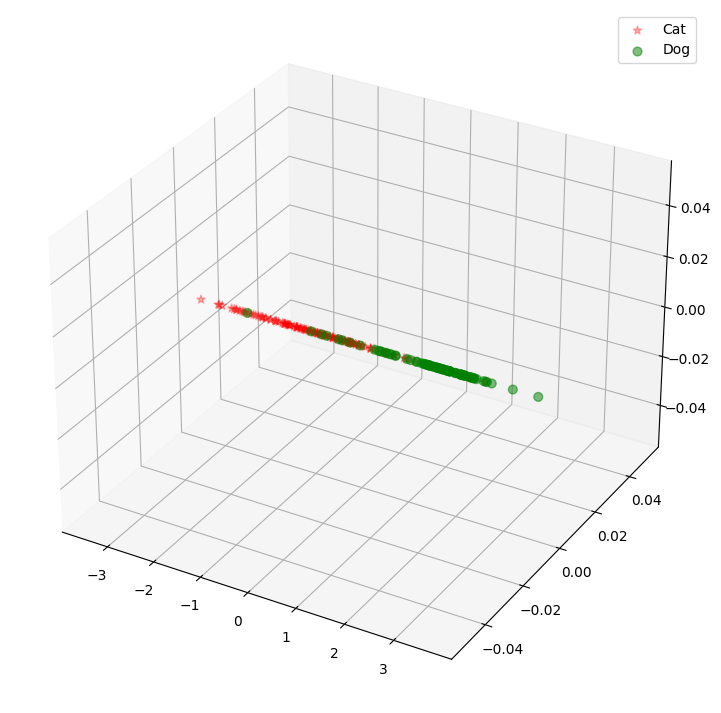

In [ ]:
Xax=X_train[:,0]
labels=y_train
cdict={"Cat":'red',"Dog":'green'}
marker={"Cat":'*',"Dog":'o'}
alpha={"Cat":.3, "Dog":.5}
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(projection='3d')
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],ys=0,c=cdict[l],label=l,s=40,marker=marker[l],alpha=alpha[l])

plt.legend()
plt.show()

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
metrics.accuracy_score(y_test, y_predict)

0.8392857142857143

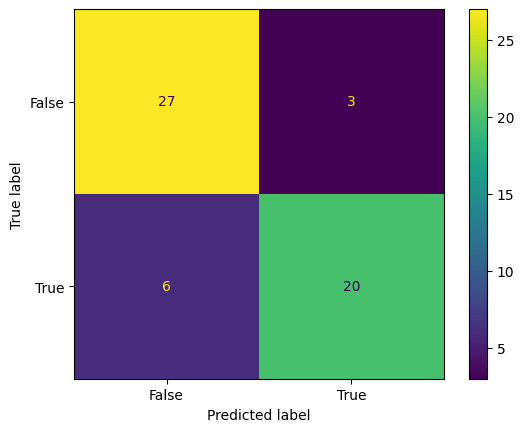

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## ML Models

In [ ]:
# define the independent variables (the ones that help with the prediction)
X = df.drop('Animal',axis="columns") # store everything but the column animal
# define the dependent variable (the one that is going to be predicted based on the independent variables)
y = df['Animal'] #store the animal column only

### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [ ]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.86327876  1.02950019 -0.06497284  0.23686368 -0.18121019  0.83519082
  -0.39879002 -0.7847552   0.09615077 -1.45869924 -0.73349752 -1.21571355
  -0.51806104 -0.71832586 -0.43489488  0.55996259]]
[-1.37459731]


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
metrics.accuracy_score(y_test, y_predict)

0.8392857142857143

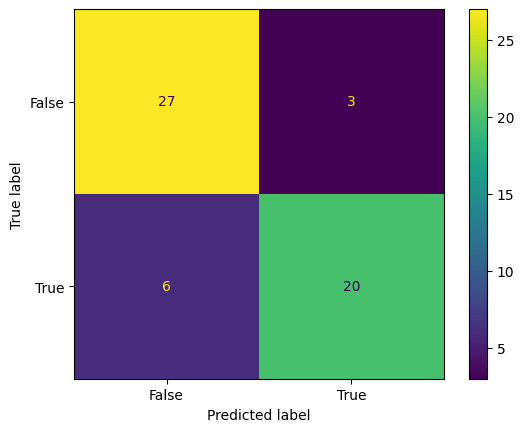

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### KNN

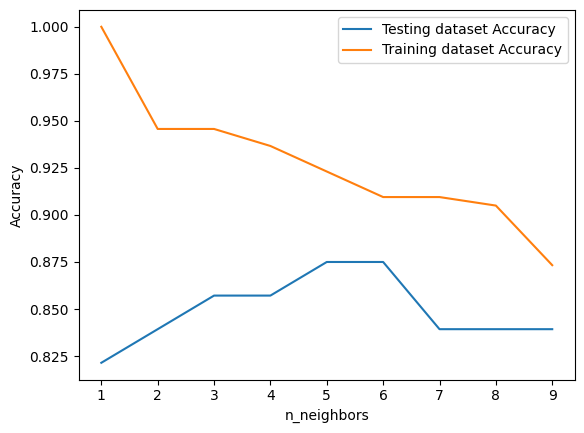

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.8571428571428571


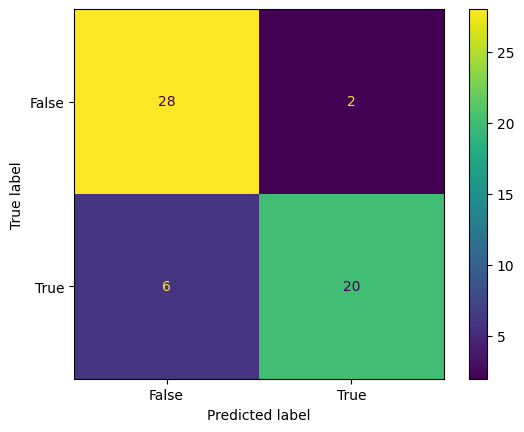

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
metrics.accuracy_score(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()